# Feature Distribution Comparison
Comparing feature distributions between Raw_Dataset_LinkedIn and Master_Dataset_LinkedIn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 9

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load both datasets
df_raw = pd.read_csv('../data/Raw_Dataset_LinkedIn.csv')
df_master = pd.read_csv('../data/Master_Dataset_LinkedIn.csv')

print(f"Raw Dataset Shape: {df_raw.shape}")
print(f"Master Dataset Shape: {df_master.shape}")

# Define features to visualize
features = [
    "Network Size",
    "Post Content Length",
    "Hook Length",
    "Semantic Alignment",
    "Sentiment Score",
    "Emoji Count",
    "Hashtag Count",
    "Linebreak Count",
    "Link Count",
    "Hour",
    "Day Of Week",
    "Has Image",
    "Has Video",
]

print(f"\nFeatures to visualize: {len(features)}")

Raw Dataset Shape: (8542, 21)
Master Dataset Shape: (3890, 21)

Features to visualize: 13


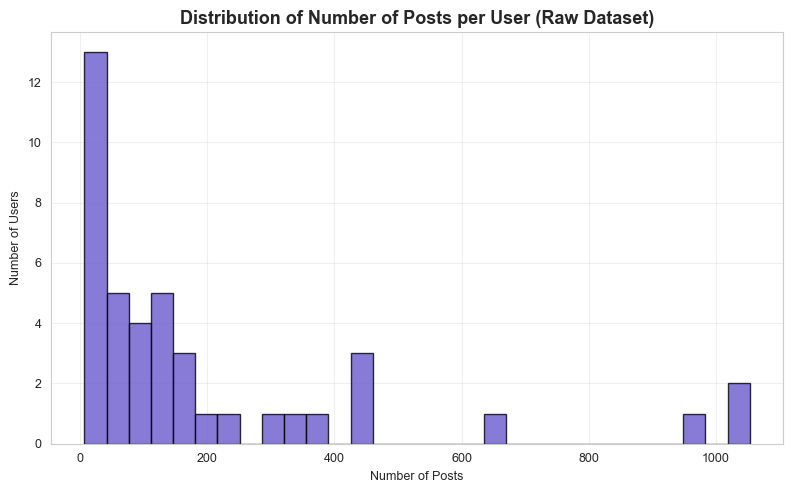

Total users: 42
Mean posts per user: 203.38
Median posts per user: 103.00
Min posts per user: 7
Max posts per user: 1053


In [3]:
# Distribution of Number of Posts per User
user_post_counts = df_raw['User ID'].value_counts()

plt.figure(figsize=(8, 5))
plt.hist(user_post_counts, bins=30, color='slateblue', alpha=0.8, edgecolor='black')
plt.title('Distribution of Number of Posts per User (Raw Dataset)', fontsize=13, fontweight='bold')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total users: {user_post_counts.size}")
print(f"Mean posts per user: {user_post_counts.mean():.2f}")
print(f"Median posts per user: {user_post_counts.median():.2f}")
print(f"Min posts per user: {user_post_counts.min()}")
print(f"Max posts per user: {user_post_counts.max()}")

## Raw Dataset Feature Distributions

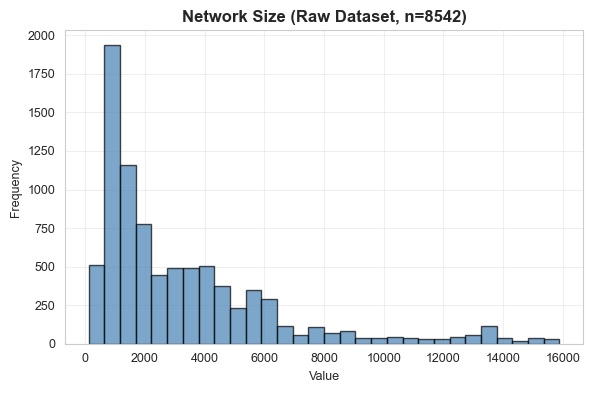

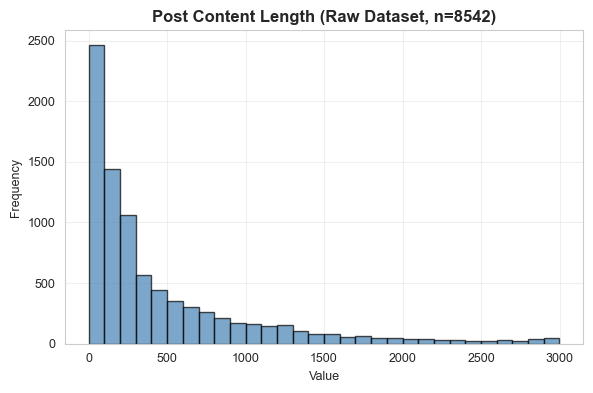

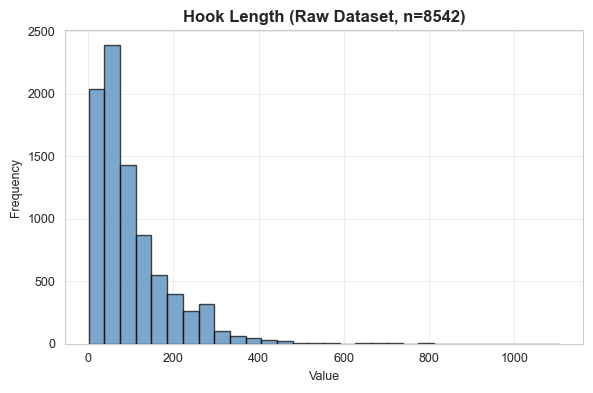

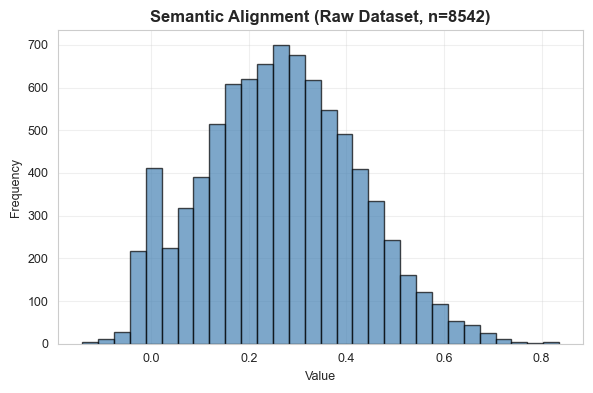

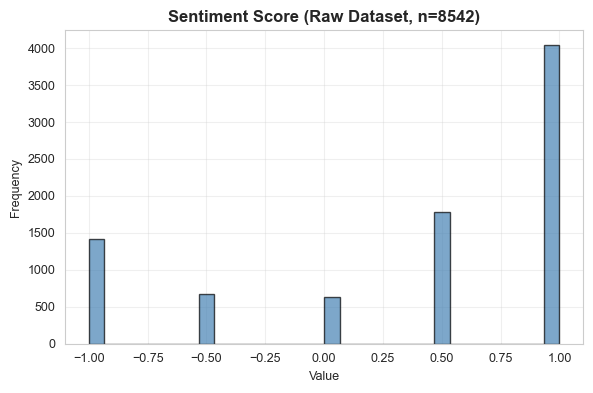

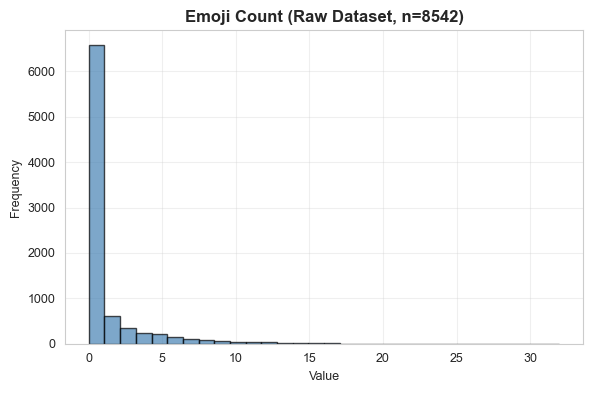

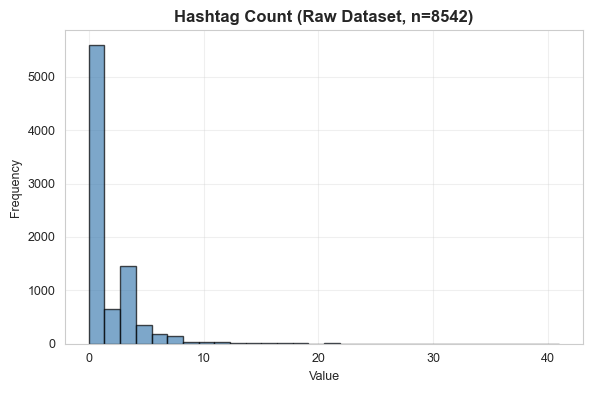

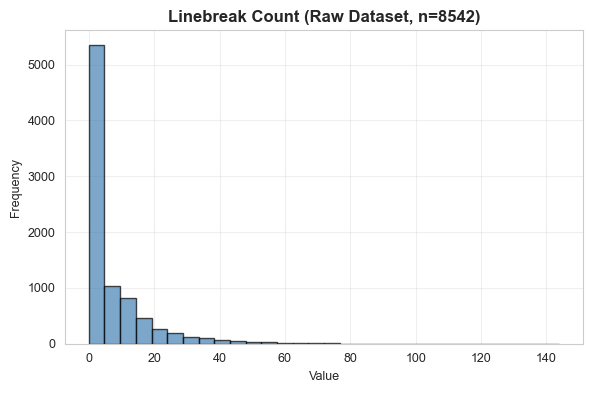

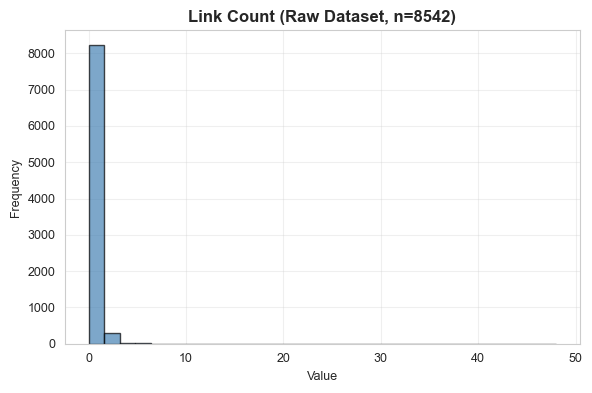

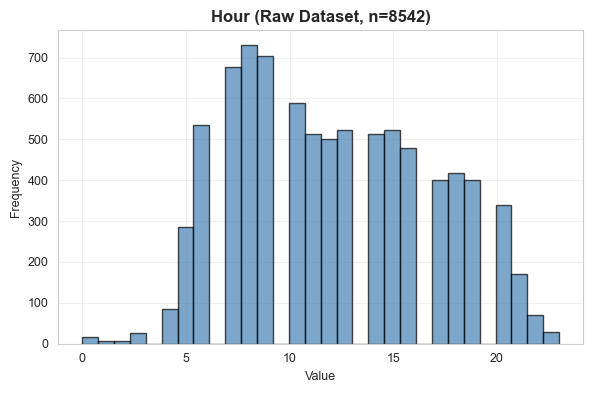

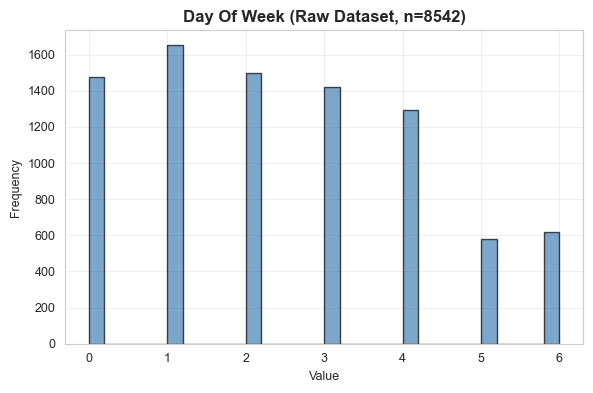

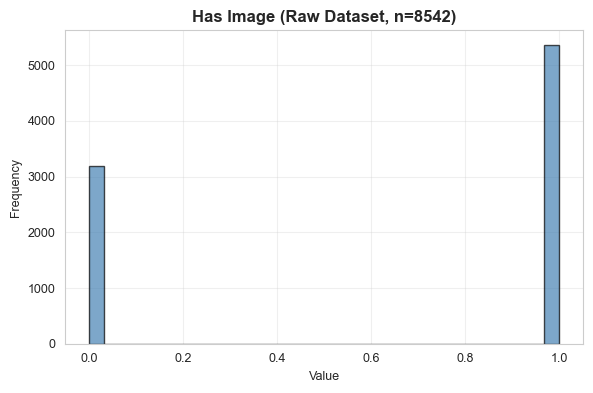

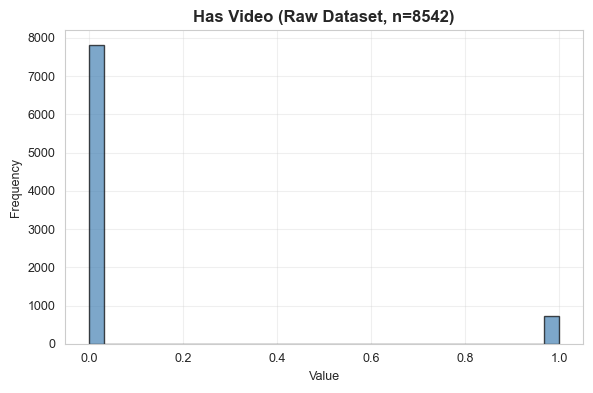

In [4]:
# Visualize Raw Dataset - Single Feature Charts for Easy Copy/Paste
for col in features:
    plt.figure(figsize=(6, 4))
    if col in df_raw.columns:
        col_data = df_raw[col].dropna().astype(float)
        plt.hist(col_data, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
        plt.title(f'{col} (Raw Dataset, n={len(df_raw)})', fontsize=12, fontweight='bold')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, f'{col}\nNot Found', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f'{col} (Missing)', fontsize=12)
    plt.tight_layout()
    plt.show()

## Analysis: Raw Dataset Distributions

### Content Features

The raw dataset reveals distinctive patterns in how users structure their LinkedIn posts:

**Post Content Length & Hook Length**: Both show strong right-skewed distributions (skewness >1.9), with most posts being relatively short but a long tail of very long posts. The median post length is 228 characters, but the mean is 482, indicating some extremely lengthy posts pull the average up. The hook length (first line) follows a similar pattern, suggesting users typically start with brief statements but occasionally write extensive opening lines.

**Emoji, Hashtag, and Link Usage**: These features are heavily zero-inflated and extremely right-skewed (skewness 3.3-3.9). The majority of posts use no emojis, hashtags, or links at all, but a small subset of posts employ these elements extensively. This bimodal distribution (either absent or present) suggests these are deliberate strategic choices rather than standard practice.

### Temporal Patterns

**Hour & Day of Week**: These temporal features are approximately uniformly distributed and symmetric (skewness ~0), indicating users post throughout all hours and days of the week fairly consistently. There's no strong temporal clustering, suggesting diverse posting strategies across the user base.

### Engagement & Network Metrics

**Network Size**: Shows a right-skewed distribution (skewness 1.78), with most users having modest networks (median 2,069 connections) but some having significantly larger ones. This reflects natural network growth variation across the user base.

**Engagement Score & Relative Engagement**: These are the most extremely skewed features (skewness 56 and 71 respectively), with massive outliers. The median engagement is very low (8 for absolute, 3.5 for relative), but a few posts achieve viral-like engagement with thousands of interactions. This extreme disparity is characteristic of social media engagement—most content goes unnoticed, while a few posts resonate dramatically.

### Semantic & Sentiment Features

**Semantic Alignment**: Nearly perfectly symmetric (skewness 0.1), ranging from -0.14 to 0.84, indicating posts cluster around 0.27 alignment with user profiles on average. This suggests moderate consistency between what users post and their professional identities.

**Sentiment Score**: Slightly left-skewed (skewness -0.93), centered around 0.5 (neutral-positive), with a range from -1 (very negative) to 1 (very positive). Users tend toward positive sentiment, though there's meaningful variance across the dataset.

## Master Dataset Feature Distributions

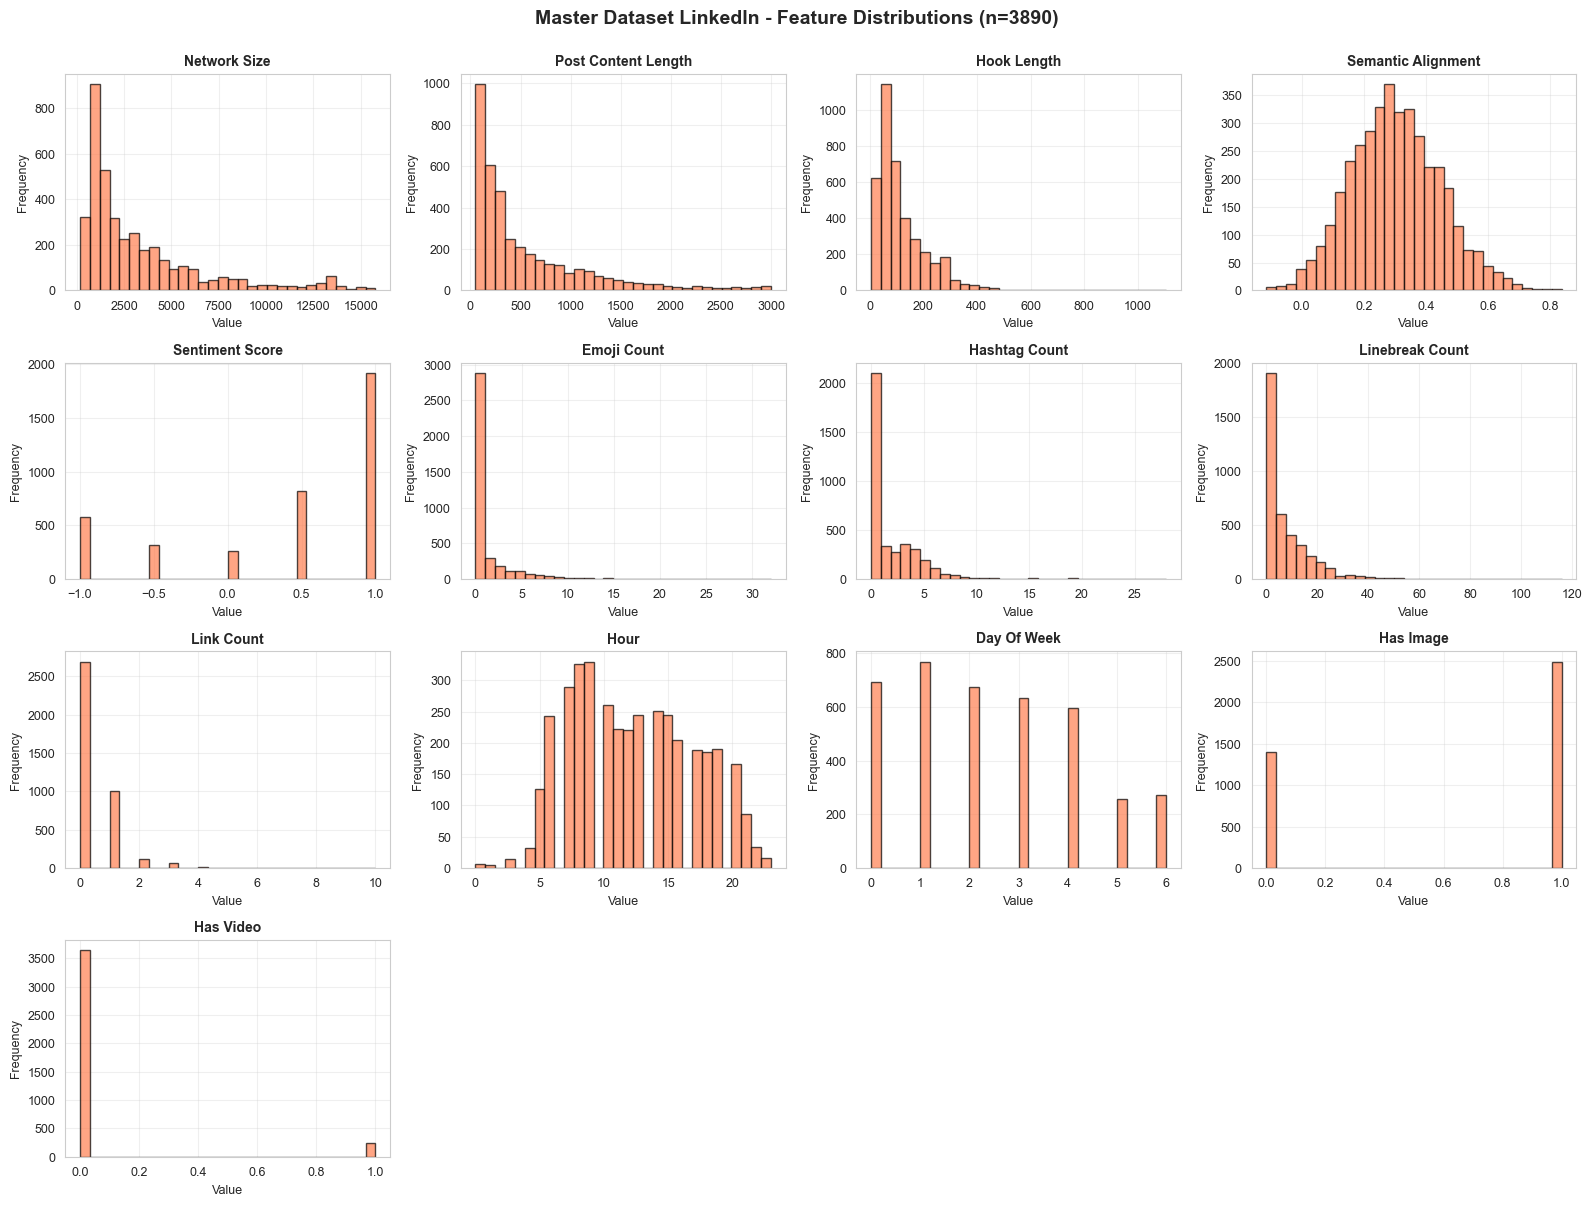

In [5]:
# Visualize Master Dataset
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(features):
    ax = axes[idx]
    
    if col in df_master.columns:
        col_data = df_master[col].dropna().astype(float)
        ax.hist(col_data, bins=30, color='coral', alpha=0.7, edgecolor='black')
        ax.set_title(f'{col}', fontsize=10, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, f'{col}\nNot Found', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{col} (Missing)', fontsize=10)

# Hide unused subplots
for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(f'Master Dataset LinkedIn - Feature Distributions (n={len(df_master)})', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Side-by-Side Comparison

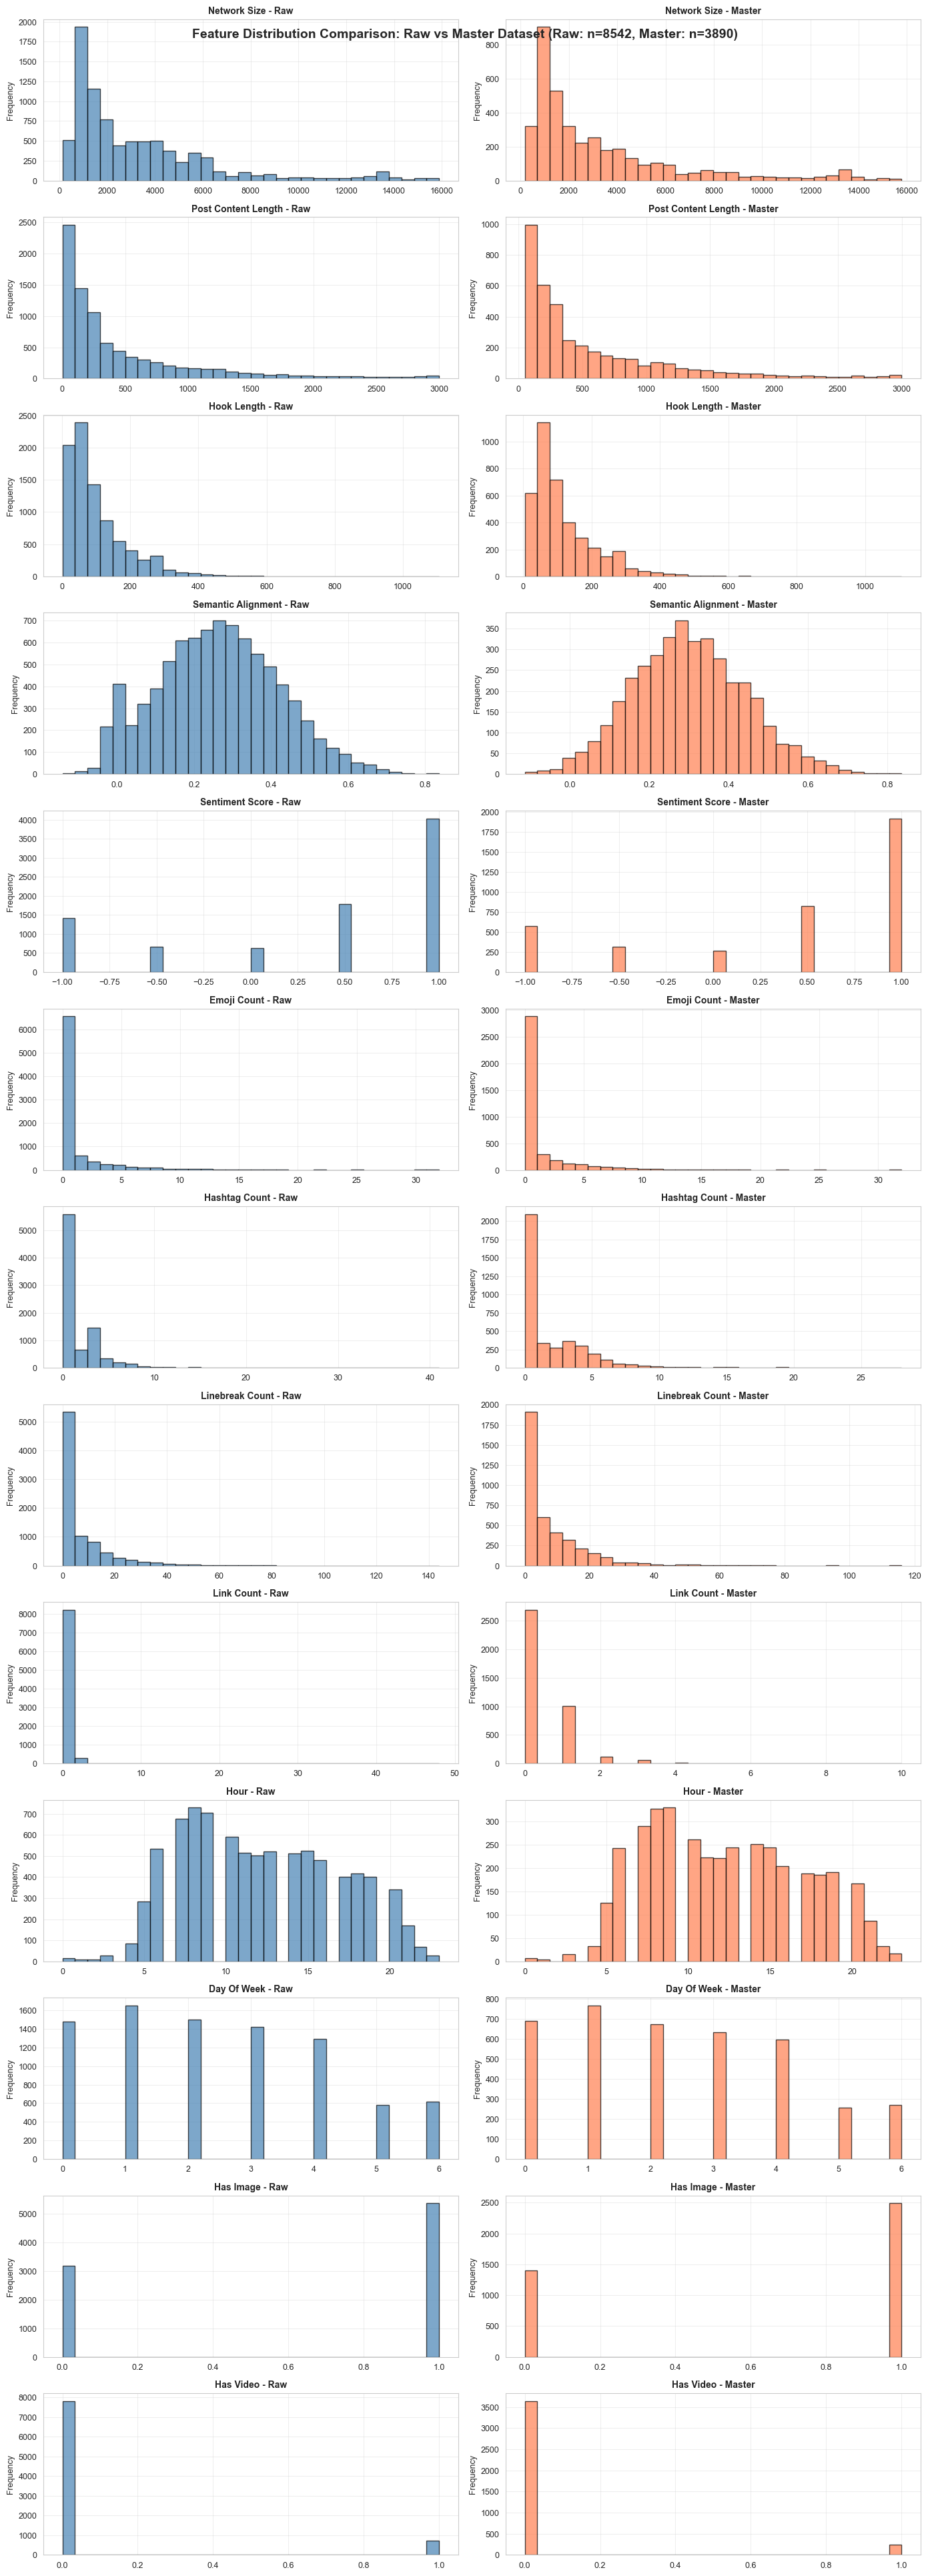

In [6]:
# Side-by-side comparison for each feature
n_cols = 2
n_rows = len(features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3*n_rows))

for idx, col in enumerate(features):
    # Raw Dataset
    ax_raw = axes[idx, 0]
    if col in df_raw.columns:
        col_data_raw = df_raw[col].dropna().astype(float)
        ax_raw.hist(col_data_raw, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
        ax_raw.set_title(f'{col} - Raw', fontsize=10, fontweight='bold')
        ax_raw.set_ylabel('Frequency')
        ax_raw.grid(True, alpha=0.3)
    
    # Master Dataset
    ax_master = axes[idx, 1]
    if col in df_master.columns:
        col_data_master = df_master[col].dropna().astype(float)
        ax_master.hist(col_data_master, bins=30, color='coral', alpha=0.7, edgecolor='black')
        ax_master.set_title(f'{col} - Master', fontsize=10, fontweight='bold')
        ax_master.set_ylabel('Frequency')
        ax_master.grid(True, alpha=0.3)

plt.suptitle(f'Feature Distribution Comparison: Raw vs Master Dataset (Raw: n={len(df_raw)}, Master: n={len(df_master)})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()